## Taking a look at our dataset

In [1]:
from lib.dataset import Dataset

In [2]:
# the dataset
dataset = Dataset()

Loading local preprocessed dataset...
Finished


Loading local files...
  Number of images in COVID/: 3616
  Number of masks in COVID/: 3616
  Number of images in Normal/: 10192
  Number of masks in Normal/: 10192
  Number of images in Viral Pneumonia/: 1345
  Number of masks in Viral Pneumonia/: 1345
  Total size: 18582


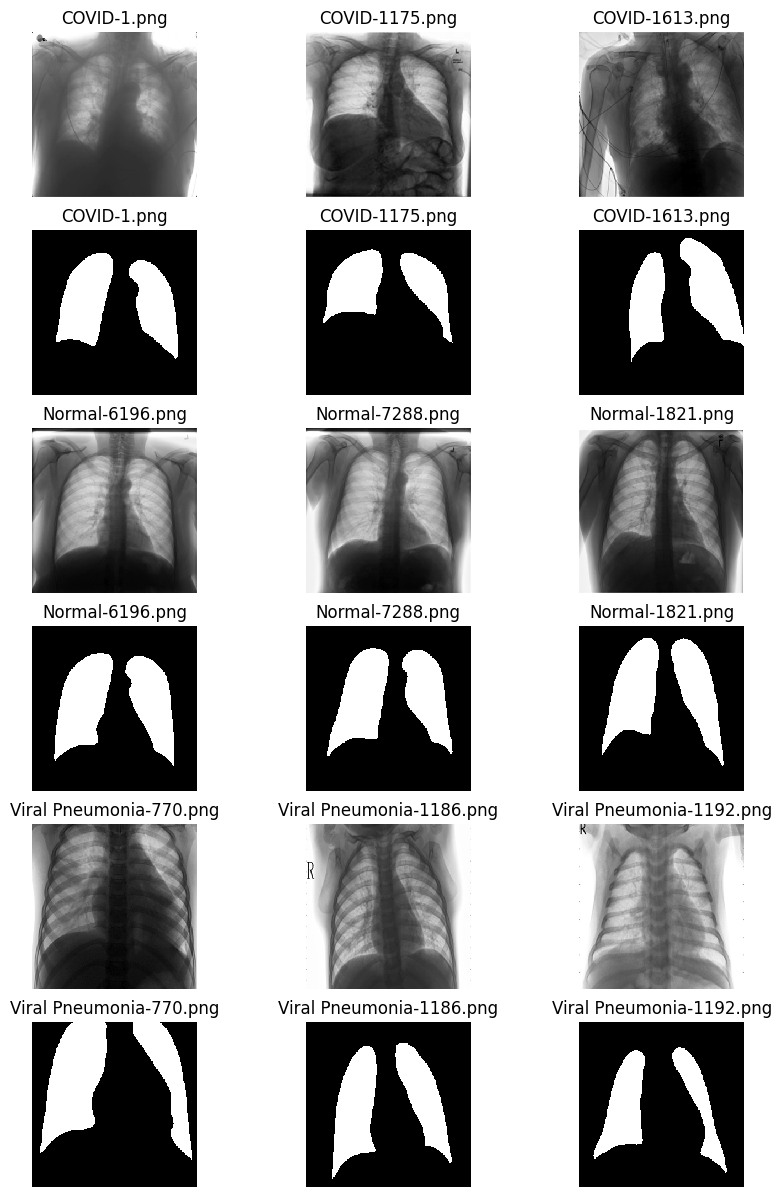

In [3]:
dataset.show_unprocessed_examples()

Example image with label COVID:


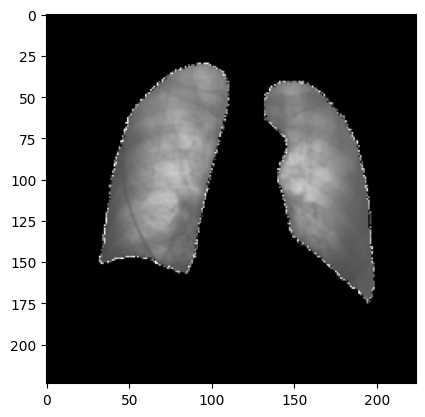

In [4]:
dataset.show_processed_example()

In [5]:
dataset.X_train.shape

(3429, 224, 224, 3)

In [6]:
dataset.X_test.shape

(606, 224, 224, 3)

## Training with different query strategies

In [2]:
# the query strategies to try

from lib.queries import random, uncertainty, margin, entropy
qss = [("random", random), ("uncertainty", uncertainty), ("margin", margin), ("entropy", entropy)]

In [8]:
# create the files for the results for each query strategy

import os
if not os.path.exists("results"):
    os.mkdir("results")
if not os.path.exists("results/al_learn"):
    os.mkdir("results/al_learn")
for qs_name, _ in qss:
    if not os.path.exists(f"results/al_learn/{qs_name}"):
        os.mkdir(f"results/al_learn/{qs_name}")
    if not os.path.exists(f"results/al_learn/{qs_name}/checkpoints.txt"):
        with open(f"results/al_learn/{qs_name}/checkpoints.txt", "w") as f:
            f.write("")

In [3]:
query_size = 32
max_train_imgs = 512  # dataset has 3429 in training set
epochs = 8
batch_size = 16

In [4]:
# the steps we will take (steps over the size of the data)
steps = [i for i in range(query_size, max_train_imgs+1, query_size)]

In [11]:
# we now train models for every query strategy, and save accuracy data along the way

import time 
from lib.activelearner import ActiveLearner
# variables for colored output
OKCYAN = '\033[96m'
ENDC = '\033[0m'

for i, (name, qs) in enumerate(qss):
    time_start = time.time()
    
    accs = []
    
    active_learner = ActiveLearner(dataset, architecture="vgg16").with_params(epochs, batch_size)
    
    for j, max_imgs in enumerate(steps):
        time_round_start = time.time()
        print(f"{OKCYAN}<{name} ({i+1}/{len(qss)}) | using {max_imgs} images ({j+1}/{len(steps)})>{ENDC}")
        
        # select less samples if we can't select the full query_size anymore
        n = min([query_size, (max_imgs - sum(active_learner.used))])

        # select samples
        active_learner.select_samples(qs, n)

        # train the model
        active_learner.train()

        # test the model
        active_learner.test()

        # save metrics to file
        with open(f"results/al_learn/{name}/checkpoints.txt", "a") as f:
            f.write(f"{str(active_learner)}\n")

        time_round = int(time.time() - time_round_start) // 60
        time_total = int(time.time() - time_start) // 60

        print(f"{OKCYAN}----> finished round in {time_round} mins  (total run time for {name}: {time_total} mins){ENDC}")



Metal device set to: Apple M1 Pro


2022-11-30 15:20:17.177785: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 15:20:17.177907: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<random (1/4) | using 32 images (1/16)>
model: selecting 32 imgs...
model: training...


2022-11-30 15:20:17.858252: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-30 15:20:18.400107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...


2022-11-30 15:20:28.100349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 64 images (2/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 96 images (3/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 128 images (4/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 160 images (5/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 192 images (6/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 224 images (7/16)>
model: selecting 32 img

2022-11-30 15:23:56.916894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 28s 259ms/step
model: training...


2022-11-30 15:24:25.593803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 0 mins)
<uncertainty (2/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 27s 253ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 1 mins)
<uncertainty (2/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 27s 253ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 2 mins)
<uncertainty (2/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 26s 253ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 2 mins)
<uncertainty (2/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 26s 253ms/step
model: training...
model: testing...
----> finished r

2022-11-30 15:34:37.479518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 32s 296ms/step
model: training...


2022-11-30 15:35:10.294638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for margin: 0 mins)
<margin (3/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 28s 260ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 1 mins)
<margin (3/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 27s 260ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 2 mins)
<margin (3/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 27s 261ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 2 mins)
<margin (3/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 27s 261ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for marg

2022-11-30 15:45:43.731871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 31s 291ms/step
model: training...


2022-11-30 15:46:15.626209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for entropy: 0 mins)
<entropy (4/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 31s 296ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 1 mins)
<entropy (4/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 31s 295ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 2 mins)
<entropy (4/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 31s 295ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 3 mins)
<entropy (4/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 30s 296ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time 

## Let's look at the results

reading data from query strategy 'random'...
reading data from query strategy 'uncertainty'...
reading data from query strategy 'margin'...
reading data from query strategy 'entropy'...


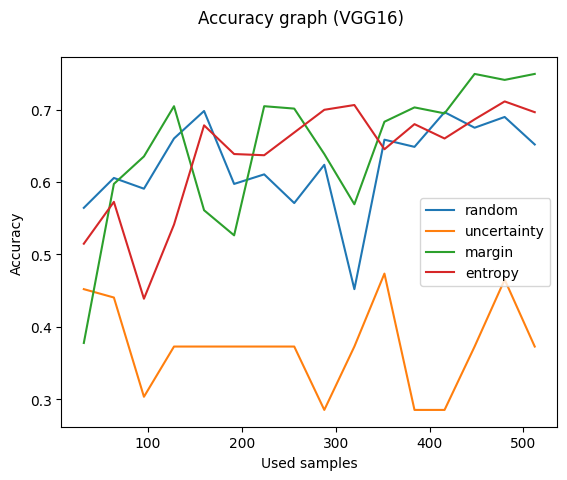

In [7]:
from matplotlib import pyplot as plt

plt.suptitle("Accuracy graph (VGG16)")
plt.xlabel("Used samples")
plt.ylabel("Accuracy")

for (name, _) in qss:
    print(f"reading data from query strategy '{name}'...")
    values = []
    with open(f"results/al_learn/{name}/checkpoints.txt", "r") as file:
        for line in file:
            line = line.split('|')
            values.append(float(line[-2]))
    plt.plot(steps, values, label=name)
plt.legend()
plt.show()